Text(0, 0.5, 'total births per year')

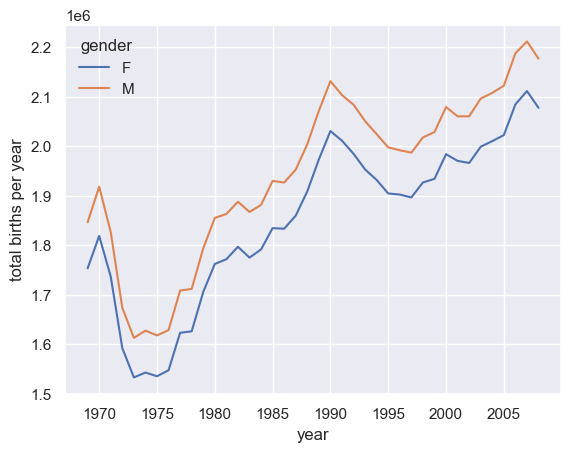

In [1]:
# 2024/02/22 Source: Python Data Science Handbook by Jake VanderPlas

# Creating a good visualization involves guiding the reader so that the figure tells a story. 
# In some cases, this story can be told in an entirely visual manner, without the need for added text, 
# but in others, small textual cues and labels are necessary.
# Perhaps the most basic types of annotations you will use are axes labels and titles, 
# but the options go beyond this.

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns

# Example: Effectas of Holidays on US Births
# Data: https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
# 
births = pd.read_csv('python data/births.csv')

# take a look at the data
births.head()

# add a decade column and look at male and female births as a function of decade
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

# visualize the total number of births by year
sns.set() # use seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')



/var/folders/dn/mkkysdj12vj4ccht164j_cpr0000gn/T/ipykernel_2292/3780060314.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
/var/folders/dn/mkkysdj12vj4ccht164j_cpr0000gn/T/ipykernel_2292/3780060314.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


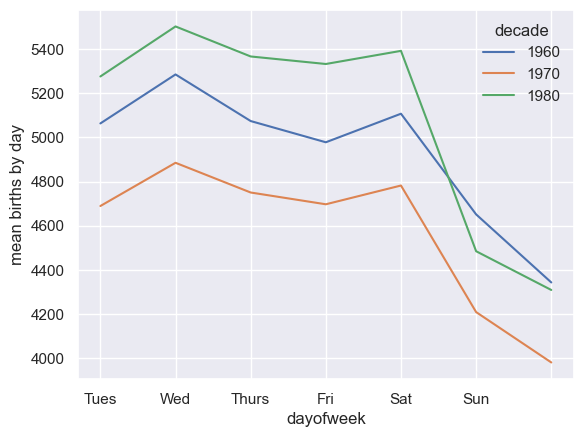

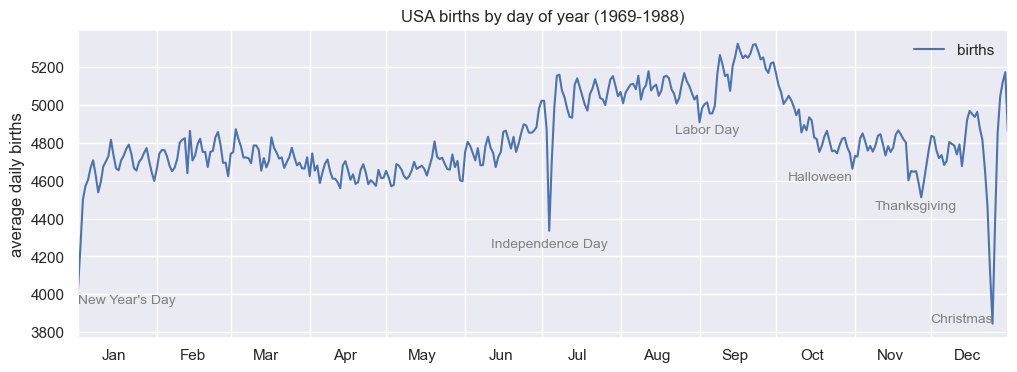

In [4]:
# remove outliers caused by mistyped dates (e.g. June 31st)or missing values (e.g. June 99th)
# this can be done via a robust sigma-clipping operation
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sigma = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sigma) & (births < @mu + 5 * @sigma)')

# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

# create a datetime index from the year, month, day
births.index =pd.to_datetime(10000 * births.year + 
                            100 * births.month +
                            births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

births.pivot_table('births', index='dayofweek',
                  columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

# group the data by month and day separately
births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])

# turn months and days into a date by associating them with a dummy year variable 
# make sure to choose a leap year so that Frb 29th is correctly handled
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='right', **style)

# label the axes
ax.set(title='USA births by day of year (1969-1988)',
      ylabel='average daily births')

# ax.text methods takes an x position, a y position, a string, and then optional keywords specifying
# the color, size, style, alignment, and other properties.
# ha is short for horizontal alighment.
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

(3600.0, 5400.0)

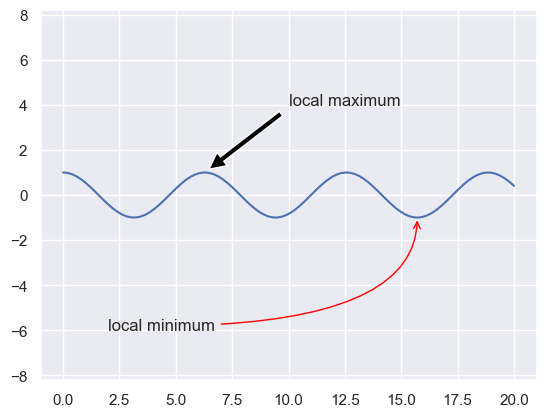

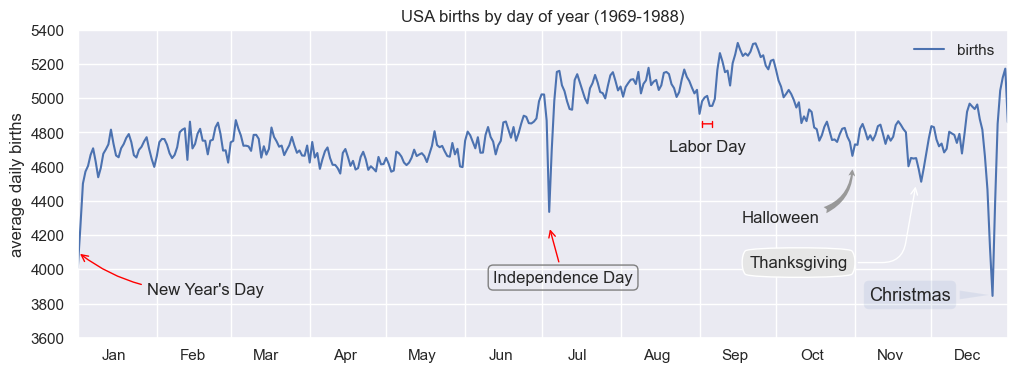

In [17]:
# Arrows and annotation
fig, ax = plt.subplots()

x = np.linspace(0, 20, 100)
ax.plot(x, np.cos(x))
ax.axis('equal') # ?

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
           arrowprops=dict(facecolor='black', shrink=0.05)) 

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
           arrowprops=dict(arrowstyle="->", color='red',
                          connectionstyle="angle3, angleA=0, angleB=-90"))
# check the matplotlib documentation for details

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax) 

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points', 
           arrowprops=dict(arrowstyle='->', connectionstyle="arc3, rad=-0.2", color='red'))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
           bbox=dict(boxstyle="round", fc='none', ec='gray'),
           xytext=(10, -40), textcoords='offset points', ha='center',
           arrowprops=dict(arrowstyle="->", color='red'))

ax.annotate("Labor Day", xy=('2012-9-4', 4850), xycoords='data', ha='center',
           xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
           xycoords='data', textcoords='data', color='red',
           arrowprops=dict(arrowstyle='|-|, widthA=0.2, widthB=0.2', color='red'))

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data', 
           xytext=(-80, -40), textcoords='offset points',
           arrowprops=dict(arrowstyle='fancy',
                          fc="0.6", ec="none",
                          connectionstyle="angle3, angleA=0, angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
           xytext=(-120, -60), textcoords='offset points',
           bbox=dict(boxstyle="round4, pad=0.5", fc="0.9"),
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="angle, angleA=0, angleB=80, rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
           xytext=(-30, 0), textcoords='offset points',
           size=13, ha='right', va='center', 
           bbox=dict(boxstyle="round", alpha=0.1),
           arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1))

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
      ylabel='average daily births')

# ax.text methods takes an x position, a y position, a string, and then optional keywords specifying
# the color, size, style, alignment, and other properties.
# ha is short for horizontal alighment.
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.set_ylim(3600, 5400)